In [2]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")


In [4]:
# df = pd.read_excel('../../data/manual_analysis/analysis_3labels_chunli.xlsx', sheet_name=2)
df = pd.read_excel('../../data/manual_analysis/hz_analysis_3labels_20221220_chunli_tag.xlsx')

print(df.shape)
print(df.columns)

(957, 25)
Index(['label', 'pred', 'n_genealogy', 'rank_by_lifecycle', 'cnt_siblings',
       'rank_by_prevalence', 'bug_proneness', 'rank_by_bugproneness',
       'is_reusable', 'project', 'type', 'link', 'CountLine',
       'CountLineComment', 'CountOutput', 'CountPath', 'CountInput',
       'Essential', 'Knots', 'cnt_group_paras', 'len_common_path',
       'cnt_distinct_contributors', 'cnt_group_followers', 'is_reusable.1',
       'Category'],
      dtype='object')


In [5]:
values = ['search', 'config','check/test/determine', 'check/test/determine', 'add/remove object from collection', 
          'event handling', 'convert', 'read/write', 'math', 'encode/decode', 'visit', 'cleanup'
         ]

In [9]:
#df_cat = df.loc[df['Category'].isin(values)]

In [6]:
df['Category'].replace(['clear', 'close'], 'clean', inplace=True)
df['Category'].replace(['read', 'write', 'read/ write'], 'read/write', inplace=True)
df['Category'].replace(['parse'], 'parser', inplace=True)
df['Category'].replace(['constructor', 'configure'], 'config', inplace=True)
df['Category'].replace(['Math.compare', 'Math.offset', 'math.count', 'Math.average', 'Math.min', 'Math.equal', 'Math.equals', 'math.equals', 'Math equals','math.min', 'compare', 'math'], 'Math', inplace=True)
df['Category'].replace(['encode', 'decode', 'serialize/deserialize'], 'encode/decode', inplace=True)
df['Category'].replace(['contains'], 'search', inplace=True)
df['Category'].replace(['initialisation'], 'config', inplace=True)
df['Category'].replace(['check/test/determine', 'test'], 'check/verify/determine', inplace=True)
display(df['Category'].value_counts())
display(df['Category'].count())

Search                        158
Convert                       113
EventHandling                 110
Read/Write                    104
Config                         84
Math                           50
Check/Determine                36
Add/Remove from collection     35
Visit                          35
Cleanup                        24
Encode/Decode                   6
Name: Category, dtype: int64

755

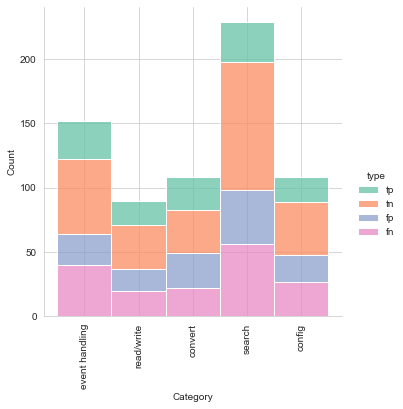

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df_show = df.loc[df['Category'].isin(['search', 'event handling', 'convert', 'read/write', 'config'])] #, 'Math', 'add/remove object from collection'])]
ax = sns.displot(df_show, x='Category', hue='type', discrete=True, palette="Set2", multiple="stack")
ax.set_xticklabels(rotation=90)
plt.savefig('save_as_a_png.png')

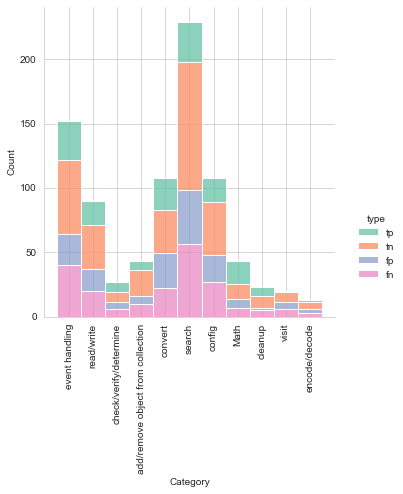

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df_show = df.loc[df['Category'].isin(['search', 'event handling', 'convert', 'read/write', 'config'])] #, 'Math', 'add/remove object from collection'])]
ax = sns.displot(df, x='Category', hue='type', discrete=True, palette="Set2", multiple="stack")
ax.set_xticklabels(rotation=90)
plt.savefig('save_as_a_png.png')

In [16]:
df_cat = df.groupby(['Category', 'type']).size().reset_index(name='count')
display(df_cat)

,Category,type,count
0,Math,fn,7
1,Math,fp,7
2,Math,tn,11
3,Math,tp,18
4,add/remove object from collection,fn,10
5,add/remove object from collection,fp,6
6,add/remove object from collection,tn,20
7,add/remove object from collection,tp,7
8,check/verify/determine,fn,6
9,check/verify/determine,fp,5


In [17]:
df_cat1 = df_cat.set_index(['Category', 'type'])['count'].unstack().reset_index()
display(df_cat1)

type,Category,fn,fp,tn,tp
0,Math,7,7,11,18
1,add/remove object from collection,10,6,20,7
2,check/verify/determine,6,5,8,8
3,cleanup,5,2,9,7
4,config,27,21,41,19
5,convert,22,27,34,25
6,encode/decode,3,3,5,2
7,event handling,40,24,58,30
8,read/write,20,17,34,19
9,search,56,42,100,31


In [18]:


df_cat1['cnt'] = df_cat1.apply(lambda x: x.tp + x.tn + x.fp + x.fn, axis=1)
df_cat1['precision'] = df_cat1.apply(lambda x: x.tp / (x.tp + x.fp), axis=1)
df_cat1['recall'] = df_cat1.apply(lambda x: x.tp / (x.tp + x.fn), axis=1)
df_cat1['F1'] = df_cat1.apply(lambda x: 2 * x.precision * x.recall / (x.precision + x.recall), axis=1)
df_cat1['accuracy'] = df_cat1.apply(lambda x: (x.tp + x.tn) / (x.tp + x.tn + x.fp + x.fn), axis=1)
#2 * (Precision * Recall) / (Precision + Recall)
display(df_cat1)

type,Category,fn,fp,tn,tp,cnt,precision,recall,F1,accuracy
0,Math,7,7,11,18,43,0.720000,0.720000,0.720000,0.674419
1,add/remove object from collection,10,6,20,7,43,0.538462,0.411765,0.466667,0.627907
2,check/verify/determine,6,5,8,8,27,0.615385,0.571429,0.592593,0.592593
3,cleanup,5,2,9,7,23,0.777778,0.583333,0.666667,0.695652
4,config,27,21,41,19,108,0.475000,0.413043,0.441860,0.555556
5,convert,22,27,34,25,108,0.480769,0.531915,0.505051,0.546296
6,encode/decode,3,3,5,2,13,0.400000,0.400000,0.400000,0.538462
7,event handling,40,24,58,30,152,0.555556,0.428571,0.483871,0.578947
8,read/write,20,17,34,19,90,0.527778,0.487179,0.506667,0.588889
9,search,56,42,100,31,229,0.424658,0.356322,0.387500,0.572052


In [24]:
df_cat1['tpr'] = df_cat1.apply(lambda x: x.tp / (x.tp + x.fn), axis=1)
df_cat1['fpr'] = df_cat1.apply(lambda x: x.fp / (x.fp + x.fn), axis=1)

display(df_cat1)

type,Category,fn,fp,tn,tp,cnt,precision,recall,F1,accuracy,tpr,fpr,auc
0,Math,7,7,11,18,43,0.720000,0.720000,0.720000,0.674419,0.720000,0.500000,0.610000
1,add/remove object from collection,10,6,20,7,43,0.538462,0.411765,0.466667,0.627907,0.411765,0.375000,0.518382
2,check/verify/determine,6,5,8,8,27,0.615385,0.571429,0.592593,0.592593,0.571429,0.454545,0.558442
3,cleanup,5,2,9,7,23,0.777778,0.583333,0.666667,0.695652,0.583333,0.285714,0.648810
4,config,27,21,41,19,108,0.475000,0.413043,0.441860,0.555556,0.413043,0.437500,0.487772
5,convert,22,27,34,25,108,0.480769,0.531915,0.505051,0.546296,0.531915,0.551020,0.490447
6,encode/decode,3,3,5,2,13,0.400000,0.400000,0.400000,0.538462,0.400000,0.500000,0.450000
7,event handling,40,24,58,30,152,0.555556,0.428571,0.483871,0.578947,0.428571,0.375000,0.526786
8,read/write,20,17,34,19,90,0.527778,0.487179,0.506667,0.588889,0.487179,0.459459,0.513860
9,search,56,42,100,31,229,0.424658,0.356322,0.387500,0.572052,0.356322,0.428571,0.463875


In [25]:
#1/2 - FPR/2 + TPR/2
df_cat1['auc'] = df_cat1.apply(lambda x: 0.5*(1 - x.fpr + x.tpr), axis=1)
display(df_cat1)

type,Category,fn,fp,tn,tp,cnt,precision,recall,F1,accuracy,tpr,fpr,auc
0,Math,7,7,11,18,43,0.720000,0.720000,0.720000,0.674419,0.720000,0.500000,0.610000
1,add/remove object from collection,10,6,20,7,43,0.538462,0.411765,0.466667,0.627907,0.411765,0.375000,0.518382
2,check/verify/determine,6,5,8,8,27,0.615385,0.571429,0.592593,0.592593,0.571429,0.454545,0.558442
3,cleanup,5,2,9,7,23,0.777778,0.583333,0.666667,0.695652,0.583333,0.285714,0.648810
4,config,27,21,41,19,108,0.475000,0.413043,0.441860,0.555556,0.413043,0.437500,0.487772
5,convert,22,27,34,25,108,0.480769,0.531915,0.505051,0.546296,0.531915,0.551020,0.490447
6,encode/decode,3,3,5,2,13,0.400000,0.400000,0.400000,0.538462,0.400000,0.500000,0.450000
7,event handling,40,24,58,30,152,0.555556,0.428571,0.483871,0.578947,0.428571,0.375000,0.526786
8,read/write,20,17,34,19,90,0.527778,0.487179,0.506667,0.588889,0.487179,0.459459,0.513860
9,search,56,42,100,31,229,0.424658,0.356322,0.387500,0.572052,0.356322,0.428571,0.463875


In [29]:
print(df.Category.value_counts())

search                               229
event handling                       152
convert                              108
config                               108
read/write                            90
add/remove object from collection     43
Math                                  43
check/verify/determine                27
cleanup                               23
visit                                 20
encode/decode                         13
Name: Category, dtype: int64


In [27]:
print(df_cat.Category.value_counts())

search                               229
event handling                       152
convert                              108
config                               108
read/write                            90
add/remove object from collection     43
cleanup                               23
visit                                 20
encode/decode                         13
Name: Category, dtype: int64


In [15]:
df_cat1 = df_cat.groupby(['Category', 'type']).size().reset_index(name='count')
df_cat1 = df_cat1.set_index(['Category', 'type'])['count'].unstack().reset_index()
df_cat1['cnt'] = df_cat1.apply(lambda x: x.tp + x.tn + x.fp + x.fn, axis=1)
df_cat1['precision'] = df_cat1.apply(lambda x: x.tp / (x.tp + x.fp), axis=1)
df_cat1['recall'] = df_cat1.apply(lambda x: x.tp / (x.tp + x.fn), axis=1)
df_cat1['F1'] = df_cat1.apply(lambda x: 2 * x.precision * x.recall / (x.precision + x.recall), axis=1)
df_cat1['accuracy'] = df_cat1.apply(lambda x: (x.tp + x.tn) / (x.tp + x.tn + x.fp + x.fn), axis=1)
#2 * (Precision * Recall) / (Precision + Recall)

In [16]:
display(df_cat1.sort_values(['cnt'], ascending=False))

type,Category,fn,fp,tn,tp,cnt,precision,recall,F1,accuracy
9,search,56.0,42.0,105.0,40.0,243.0,0.487805,0.416667,0.449438,0.596708
6,event handling,40.0,24.0,58.0,21.0,143.0,0.466667,0.344262,0.396226,0.552448
4,convert,22.0,27.0,37.0,26.0,112.0,0.490566,0.541667,0.514851,0.562500
3,config,27.0,21.0,40.0,20.0,108.0,0.487805,0.425532,0.454545,0.555556
8,read/write,20.0,17.0,34.0,20.0,91.0,0.540541,0.500000,0.519481,0.593407
7,math,7.0,7.0,10.0,18.0,42.0,0.720000,0.720000,0.720000,0.666667
0,add/remove object from collection,10.0,6.0,17.0,8.0,41.0,0.571429,0.444444,0.500000,0.609756
2,cleanup,5.0,2.0,9.0,7.0,23.0,0.777778,0.583333,0.666667,0.695652
5,encode/decode,2.0,2.0,2.0,2.0,8.0,0.500000,0.500000,0.500000,0.500000
1,check/test/determine,4.0,NaN,3.0,2.0,NaN,NaN,0.333333,NaN,NaN


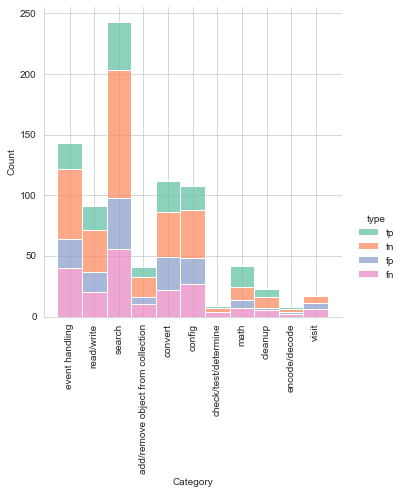

In [26]:

ax = sns.displot(df_cat, x='Category', hue='type', 
                  discrete=True, 
                 palette="Set2", multiple="stack")
ax.set_xticklabels(rotation=90)

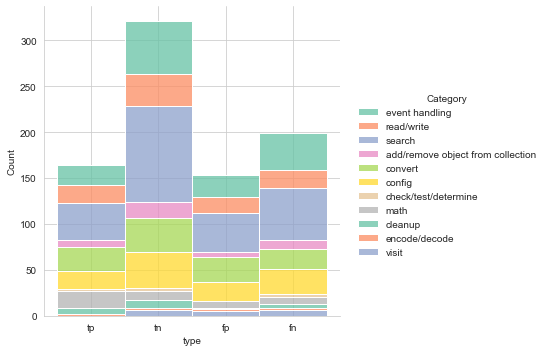

In [25]:

sns.set_style("whitegrid")
df_cat = df.loc[df['Category'].isin(values)]
ax = sns.displot(df_cat, x='type', hue='Category', palette="Set2", multiple="stack")
plt.savefig('save_as_a_png.png')
#ax.set_xticklabels(rotation=90)
#sns.set(rc = {'figure.figsize':(6,5)})
#ax = sns.displot(df[columns], x="category1")
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

<AxesSubplot:xlabel='type', ylabel='CountOutput'>

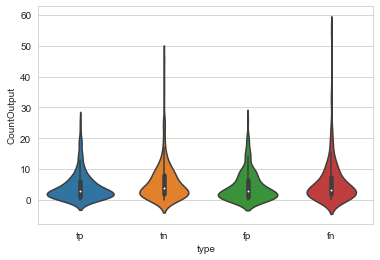

In [18]:
sns.violinplot(x='type', y='CountOutput', data=df) # CountOutput == Fanout

(917, 28)
(179, 28)
(207, 28)
(386, 28)


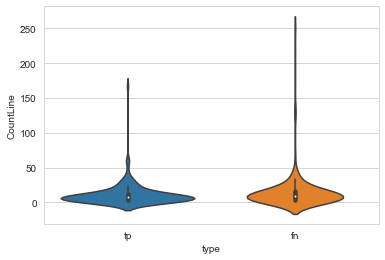

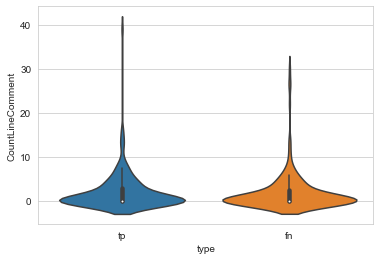

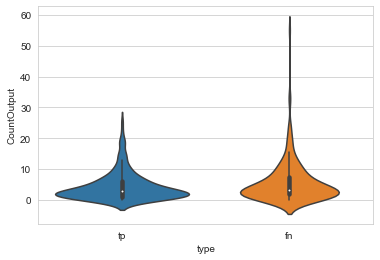

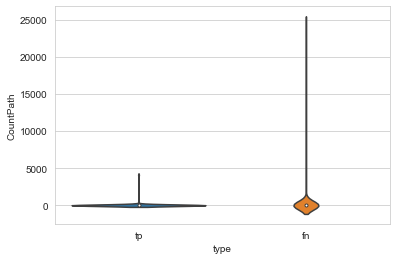

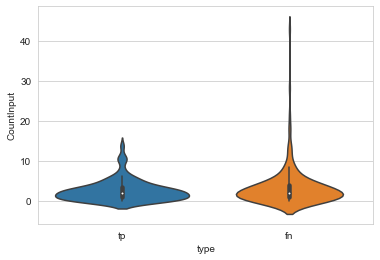

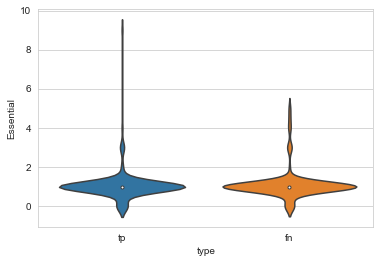

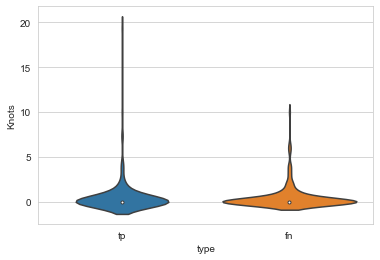

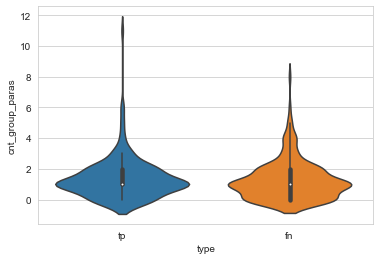

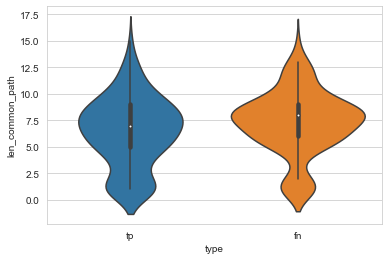

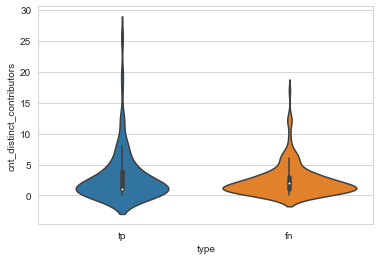

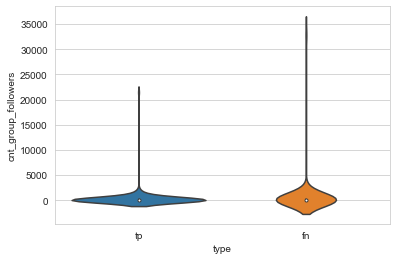

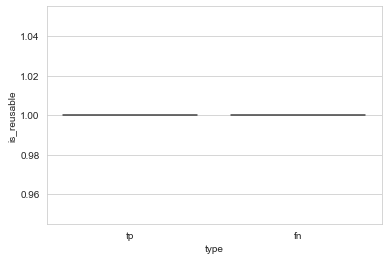

In [20]:
import matplotlib.pyplot as plt

print(df.shape)
df_tp = df[df['type']=='tp']
print(df_tp.shape)
df_fn = df[df['type']=='fn']
print(df_fn.shape)

df_tp_fn = pd.concat([df_tp, df_fn])
print(df_tp_fn.shape)

df.rename(columns = {'Unnamed: 12': 'tag'}, inplace=1)

FEATURES = ['CountLine','CountLineComment','CountOutput','CountPath','CountInput', 'Essential','Knots','cnt_group_paras' ,'len_common_path' ,'cnt_distinct_contributors','cnt_group_followers','is_reusable']
for feature in FEATURES:
    plt.figure()
    sns.violinplot(x='type', y=feature, data=df_tp_fn)

# Cohen's Kappa


In [101]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
df = pd.read_excel('../data/rq3_analysis/hz_analysis_3labels_test.xlsx', sheet_name='from_chunli')
df['Category1'].replace(['test', 'check/test/determine'], 'check/verify/determine', inplace=True)
df['Category1'].replace(['Math'], 'math', inplace=True)
df['Category1'].value_counts()
df['Category2'].replace(['Config', 'configure'], 'config', inplace=True)
df['Category2'].replace(['Math'], 'math', inplace=True)
df['Category2'].replace(['add', 'add/remove', 'append'], 'add/remove object from collection', inplace=True)
df['Category2'].replace(['check', 'Check/ test', 'Test', 'test', 'check/test/determine'], 'check/verify/determine', inplace=True)
df['Category2'].replace(['read', 'write', 'read/ write'], 'read/write', inplace=True)
df['Category2'].replace(['remove'], 'add/remove object from collection', inplace=True)
df['Category2'].replace(['error handling'], 'event handling', inplace=True)
df['Category2'].replace(['encoding', 'decode'], 'encode/decode', inplace=True)
df['Category1'].fillna('UNKNOWN', inplace=True)
df['Category2'].fillna('UNKNOWN', inplace=True)
#calculate Cohen's Kappa
cohen_kappa_score(df.Category1.values, df.Category2.values, weights=None)
# cohen_kappa_score(rater1.Category.values[:160], rater2.Category.values[:160], weights=None)
# rater1 = pd.read_excel('../data/rq3_analysis/hz_analysis_3labels_test.xlsx', sheet_name='from_chunli')
# rater2 = pd.read_excel('../data/rq3_analysis/hz_analysis_3labels_test.xlsx', sheet_name='rater2')

0.6191115159929093

In [ ]:
rater1 = df['Category1']
rater2 = df['Category2']

In [60]:
rater1['Category'].value_counts()

search                               229
event handling                       152
convert                              108
config                               108
read/write                            90
add/remove object from collection     43
math                                  41
cleanup                               23
visit                                 20
check/test/determine                  15
encode/decode                          8
test                                   8
serialize/deserialize                  5
check/verify/determine                 4
Math                                   2
Name: Category, dtype: int64

In [61]:
rater2['Category'].value_counts()

event handling                       277
search                               186
config                               123
convert                               64
math                                  43
cleanup                               43
add/remove object from collection     27
read/write                            24
visit                                 20
write                                 15
test                                   9
read                                   8
decode                                 5
Check/ test                            4
append                                 4
Config                                 4
check                                  4
read/ write                            4
remove                                 3
Test                                   3
Math                                   2
encode/decode                          2
configure                              1
encoding                               1
serialize/deseri

event handling                       277
search                               186
config                               128
convert                               64
read/write                            51
math                                  45
cleanup                               43
UNKNOWN                               40
add/remove object from collection     34
check/verify/determine                20
visit                                 20
encode/decode                          8
serialize/deserialize                  1
Name: Category, dtype: int64


In [53]:
rater1['Category'].value_counts()

search                               229
event handling                       152
convert                              108
config                               108
read/write                            90
UNKNOWN                               61
add/remove object from collection     43
math                                  43
check/verify/determine                27
cleanup                               23
visit                                 20
encode/decode                          8
serialize/deserialize                  5
Name: Category, dtype: int64

In [54]:
rater2['Category'].value_counts()

event handling                       277
search                               186
config                               128
convert                               64
read/write                            51
math                                  45
cleanup                               43
UNKNOWN                               40
add/remove object from collection     34
check/verify/determine                20
visit                                 20
encode/decode                          8
serialize/deserialize                  1
Name: Category, dtype: int64

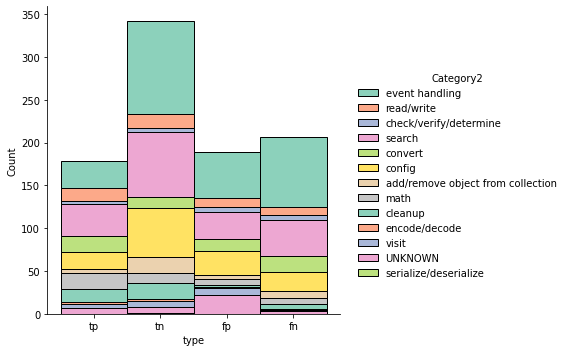

In [109]:
import seaborn as sns
ax = sns.displot(df, x='type', hue='Category2', palette="Set2", multiple="stack")

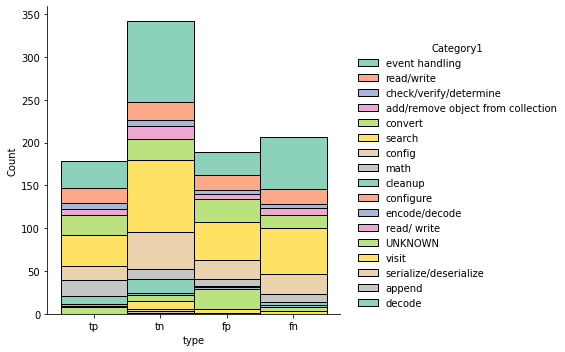

In [110]:
import seaborn as sns
ax = sns.displot(df, x='type', hue='Category1', palette="Set2", multiple="stack")

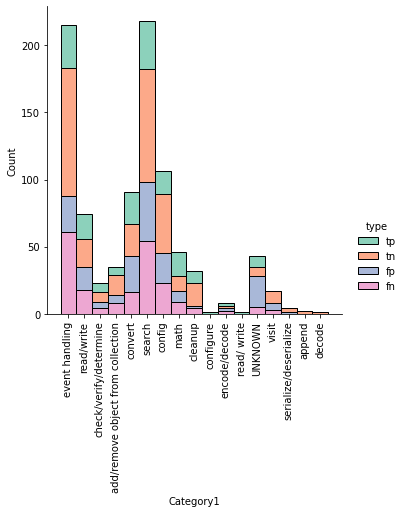

In [111]:
ax = sns.displot(df, x='Category1', hue='type', 
                  discrete=True, 
                 palette="Set2", multiple="stack")
ax.set_xticklabels(rotation=90)

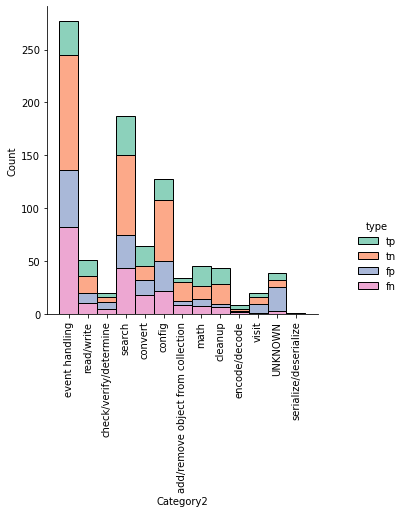

In [112]:
ax = sns.displot(df, x='Category2', hue='type', 
                  discrete=True, 
                 palette="Set2", multiple="stack")
ax.set_xticklabels(rotation=90)